# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План работ:
1 этап.
Изучим датасет ,используем для этого .info(), вывод первых и посследних столбцов таблицы.
Добавим описание данных в нашу тетрадку.
Выведем сводную статистику по таблице.
Построим гистограммы по каждому столбцу.
Определим пропуски в столбцах, посчитаем их сумму и определим количество явных дубликатов.
Вывод
2 этап.
Проанализируем количество пропусков, оценим на сколько оно влияет на наши дальшнейшие исследования. Обработаем их , методом удаления либо замены на определённое значение в случае необходимости.
Изменим тип данных в столбцах где это необходимо.
Вывод
3этап.
Добавляем новые столбцы и проводим расчёты , согалсно задания.
Вывод
4 этап
Строим гистограммы методом plot по интересующим нас столбцам с интересующими нас параметрами.
Сравниваем на графиках стоимость недвижимости с интересующими нас параметрами( по заданию)
Определяем как быстро продаются квартиры, что больше всего влияет на стоимость недвижимости.
Вывод
5 Общий вывод
</div>




### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #Импортируем библиотеку пандас



In [2]:
#Присваиваем переменной data чтение интересующего нас файла
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')

In [3]:
data.info() # Используем метод info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Выведем 5 первых строк 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
#Выведем 5 последних строк 
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Добавим сюда описание данных для удобства :
#airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
#balcony — число балконов
#ceiling_height — высота потолков (м)
#cityCenters_nearest — расстояние до центра города (м)
#days_exposition — сколько дней было размещено объявление (от публикации до снятия)
#first_day_exposition — дата публикации
#floor — этаж
#floors_total — всего этажей в доме
#is_apartment — апартаменты (булев тип)
#kitchen_area — площадь кухни в квадратных метрах (м²)
#last_price — цена на момент снятия с публикации
#living_area — жилая площадь в квадратных метрах (м²)
#locality_name — название населённого пункта
#open_plan — свободная планировка (булев тип)
#parks_around3000 — число парков в радиусе 3 км
#parks_nearest — расстояние до ближайшего парка (м)
#ponds_around3000 — число водоёмов в радиусе 3 км
#ponds_nearest — расстояние до ближайшего водоёма (м)
#rooms — число комнат
#studio — квартира-студия (булев тип)
#total_area — общая площадь квартиры в квадратных метрах (м²)
#total_images — число фотографий квартиры в объявлении
# Последняя строчка 23698 , значит строк в таблице ; (первая 0)

In [7]:
#Вычислим и отобразим сводную статистику по таблице с помощью метода describe()
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

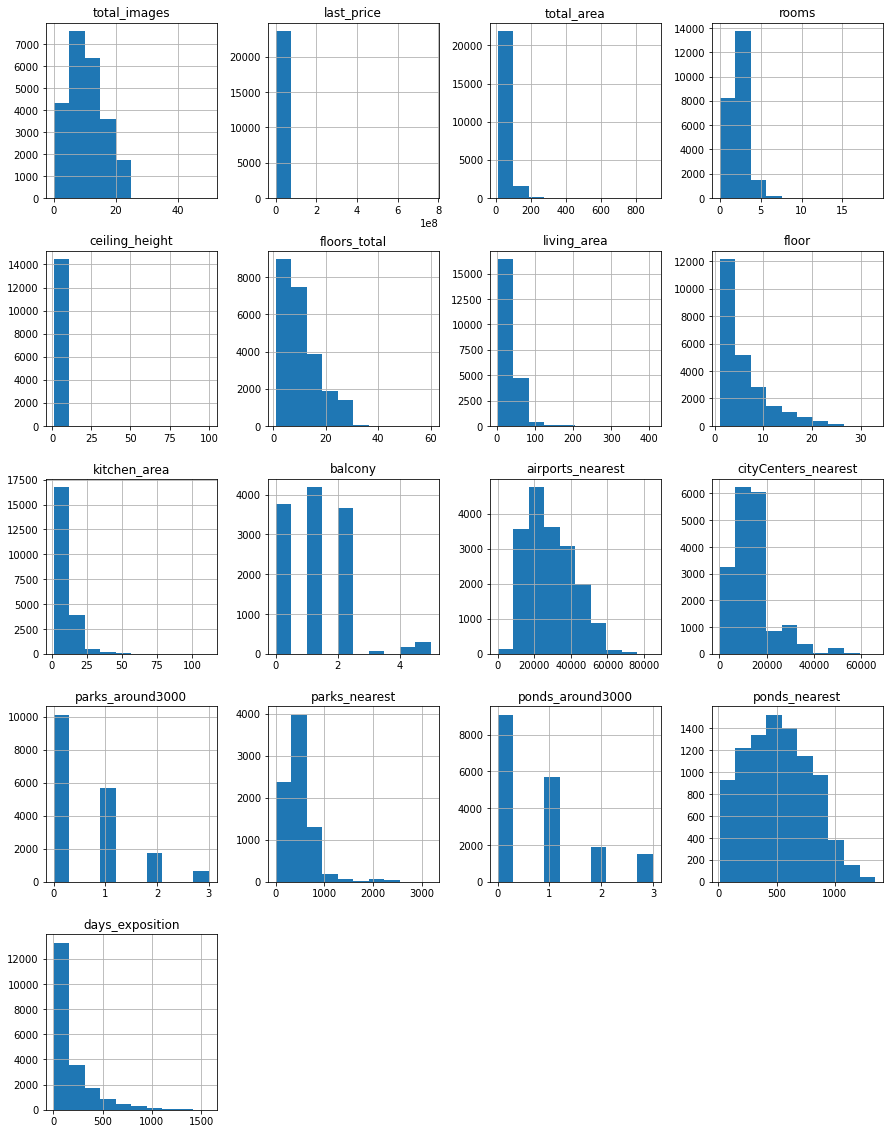

In [8]:
# Построим гистограммы для всех столбцов с помощью метода hist()
data.hist (figsize= (15,20))

In [9]:
#Определим пропуски и посчитаем сумму пропусков в таблице
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
#Определим явные дубликаты и посчитаем их сумму:
data.duplicated().sum()

0

In [11]:
# Вывод:
# Не все столбцы имеют правильный вид данных, например столбец под №9 Is apparment имеет неверный тип данных , должен быть булев тип ( Аппартаменты -1 , не аппартаменты - 0),
# Выделил столбец  № 9т.к в нём подавляющее число пропусков
# Большое количество пропусков по таблице в целом.
#Из того ,что бросается в глаза отмечу, что стоимость недвижимости в г.Санкт-Петербург заметно отличается от цен в населённых пунктах вокруг.
#Минимальное значение  количества комнат - 0 (можно предположить ,что это комерческая недвижимость )
#Максимальное значение высоты потолков - 100 (очепятка?)
#Название столбца cityCenters_nearest (змеинный язык)
#Явные дубликаты в таблице отсутствуют
#Столбец  cityCenters_nearest ,змеиный язык.

### Предобработка данных

In [12]:
#Выведем ещё раз пропуски в таблице
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Разберём каждый столбец с пропусками и определим какие пропуски можно заменить на 0, а какие не стоит.
celling_height - высота потолков в метрах :9125 пропусков, возможно тот, кто размещает объявление не знает точной высоты потолка, поэтому оставляет это знчение пропущенным. Логичной замены нет.
floors_total - общее количество этажей : 86 пропусков, количество незначительно, на результат исследований не повлияет. Удалим пропуски для перевода в тайп инт.
living_area - жилая площадь в квадратных метрах : 1903 пропуска,для того чтобы знать сколько метров составляет жилая из общей требуются документы, отсюда и пропуски в данных.Логичной замены нет.
is_apartment - аппартаменты (булев тип) : 20924 пропуска, самое большое количество пропусков, возможно показатель True (1) встречается очень редко , поэтому заменим все пропуски на 0(False).
kitchen_area - площадь кухни в квадратных метрах : 2278 пропусков,для указания точной площади кухни , тоже нужны документы, возможно объявление выставляется риелтором , когда у него ещё нет всех данных на руках- логичной замены нет.
balcony - балконы : 11519 пропусков , можем предположить , что пропуск обозначает отсутствие балкна , следовательно можем заменить на 0.
locality_name - название населённого пункта : 49 пропусков, количество не значительно , логичной замены нет,пропуски удалим т.к логичнее будет удалить , чем поставить поставить например 0 , локация важный фактор.
airports_nearest -расстояние до ближайшего аэропорта в метрах :5542 пропуска,картографические данные пропусков логичной замены нет.
cityCenters_nearest - расстояние до центра города в метрах : 5519 пропусков, картографические данные пропусковлогичной замены нет.
parks_around3000 -число парков в радиусе 3км -5518 пропусков ,картографические данные пропусков -логичной замены нет
parks_nearset - расстояние до ближайшего водоёма в метрах 15620 пропусков,картографические данные пропусков - логичной замены нет
ponds_around3000 - число водоёмов в радиусе 3км 5518 пропусков,картографические данные пропусков -логичной замены нет 
ponds_nearset - расстояние до ближайшего водоёма в метрах :14589 ,картографические данные пропусков -логичной замены нет
days_exposition- дней было размещено объявлением : 3181 пропуск ,картографические данные - логичной замены нет 
Итог: пропуски в столбце is_appartment меняем на 0(False) , пропуски в столбце balcony меняем на 0 , остальные пропуски оставляем т.к нет логичной замены , либо число пропусков не повлияет критично на проведение исследования.

In [13]:
#Заменяем пропуски в столбце is appartment на False:
data['is_apartment'].fillna(False, inplace=True)
#Проверяем:
data['is_apartment'].isna().sum()

0

In [14]:
#Заменяем пропуски в столбце balcony на 0:
data['balcony'].fillna(0,inplace=True)
#Проверяем:
data['balcony'].isna().sum()

0

In [15]:
#Изменение типа данных ,снова рассмотрим типы данных в каждом столбце:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#Столбцы last_price , balcony, days_exposition dtype меняем на int
#Столбец is_apartment меняем на bool.


In [16]:
#Для изменения float на int потребовалось санчала удалить пропуски.
data[['last_price','balcony']].dropna()
data[['last_price','balcony']].isna().sum()

last_price    0
balcony       0
dtype: int64

In [17]:
#Изменяем тип данных last_price,balcony с float на int
data[['last_price','balcony']] = data[['last_price','balcony']].astype(int)
#Проверяем:
data[['last_price','balcony']].isna().sum()

last_price    0
balcony       0
dtype: int64

In [18]:
#Изменяем тип данных is_apartment на bool
data['is_apartment'] = data['is_apartment'].astype(bool)
#Проверяем:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [19]:
# Также стобец floors_total удаляем пропуски и меняем dtype с float на int
data=data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()

0

In [20]:
# Меняем тип данных
data[['floors_total']]=data[['floors_total']].astype(int)
#Проверяем 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  int64  
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  int64  
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [21]:
#Следующим шагом изучим уникальные значения в столбцах с названиями населённых пунктов, locality_name:
data['locality_name'].sort_values().unique()


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Видим что "посёлок","поселок городского типа","посёлок городского типа","городской посёлок"дублируют друг друга - это неявные дубликаты.


In [22]:
#Заменим названия в уже существующем столбце:
data['locality_name'] = (
    data['locality_name']
    .replace(['поселок', 'поселок городского типа','посёлок городского типа','городской посёлок'], 'посёлок', regex=True)
) 
#Проверяем:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Янино-1',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово'

In [23]:
#Удалим пропуски в столбце locality_name
data = data.dropna(subset = ['locality_name'])
#Проверяем
data['locality_name'].isna().sum()

0

In [24]:
#update#
#При создании новых столбцов с помощью столбца first_day_exposition , мы выяснили что тип данных в этом столбце нужно перевести в тип datetime, Ошибка: Can only use .dt accessor with datetimelike values
#Переводим столбец first_day_exposition в datetime c помощью pd.to_datetime
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'] ,format='%Y-%m-%dT%H:%M:%S')
#Проверяем :
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Вывод:
На данном этапе мы заполнили пропуски (либо удалили их) и изменили dtype интересующих нас столбцов.

3 Посчитайте и добавьте в таблицу новые столбцы

In [25]:
#Добавим в таблицу новые столбцы:
#цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
#месяц публикации объявления;
#год публикации объявления;
#тип этажа квартиры (значения — «‎первый», «последний», «другой»);
#расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [26]:
#Цена одного квадратного метра :
data['price_quare_meter'] = data['last_price'] / data['total_area']
#Округляем до двух знаков после запятой,с помощью метода round (Аргумент 2 - 2 знака после запятой)
data['price_quare_meter'] = data['price_quare_meter'].round(2)
#Проверяем:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_quare_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


In [27]:
#Добавляем столбец day_week день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):
data['day_week'] = data['first_day_exposition'].dt.weekday
#Проверяем:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_quare_meter,day_week
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1


In [28]:
#Добавляем столбец с месяцем публикации (month)
data['month']= data['first_day_exposition'].dt.month
#Проверяем:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_quare_meter,day_week,month
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6


In [29]:
#Добавляем столбец с годом публикации (year)
data['year'] = data['first_day_exposition'].dt.year
#Проверяем:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_quare_meter,day_week,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


In [30]:
#Добавляем столбец floor_category с этажом квартиры (значения — «первый», «последний», «другой»)
#Создаём функцию для определения категории этажа:search_floor_category
def search_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    


In [31]:
#Теперь добавляем столбец floor_category с  функцией search_floor_category
data['floor_category'] = data.apply(search_floor_category,axis=1) #Выполнить построчно
#Проверяем:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_quare_meter,day_week,month,year,floor_category
23694,9,9700000,133.81,2017-03-21,3,3.7,5,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,NaN,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.0,17,NaN,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой
23698,4,1350000,32.30,2017-07-21,1,2.5,5,12.3,1,False,...,NaN,NaN,NaN,NaN,NaN,41795.67,4,7,2017,первый


In [32]:
#Создаём столбец distance_centre_km #расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
data['distance_centre_km']=round(data['cityCenters_nearest']/1000) #Расстояние до центра в метрах делим на 1000 = расстояние в км, округляем.
#Проверяем:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_quare_meter,day_week,month,year,floor_category,distance_centre_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


Вывод:Добавили в таблицу новые столбцы с интересующими нас параметров в интересующем нас виде.

4 Проведите исследовательский анализ данных

<AxesSubplot:ylabel='Frequency'>

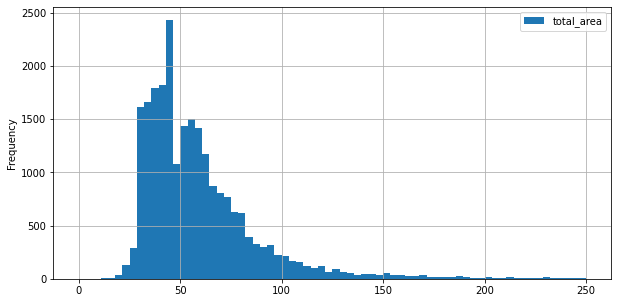

In [33]:
#Построим гистограммы по каждому интересующему нас столбцу таблицы:
# Общая площадь , total_area:
import matplotlib.pyplot as plt # Импортируем библиотеку для построения гистограм методом plot.
data.plot(y='total_area',kind='hist',bins=70,grid=True,range=(0,250),figsize=(10,5))

In [34]:
data['total_area'].describe() #выведем также описательную статистику столбца total_area


count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

По данной гистограмме можно сделать вывод что большинство квартир имеют суммарную площадь 30-45 квадратных метров.
Интересна просадка на графике около 50 кв.м.

<AxesSubplot:ylabel='Frequency'>

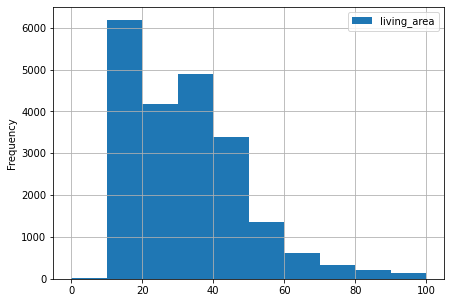

In [35]:
# Жилая площадь living_area
data.plot(y='living_area',kind='hist',bins=10,grid=True,range=(0,100),figsize=(7,5))

In [36]:
#выведем сводную описательную статистику столбца living_area
data['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

По гистограмме мы видим что большинство объектов имеют жилую площадь, 15-20 кв.м, это можно объяснить тем, что большинство квартир могут быть небольшие квартиры студии например.

<AxesSubplot:ylabel='Frequency'>

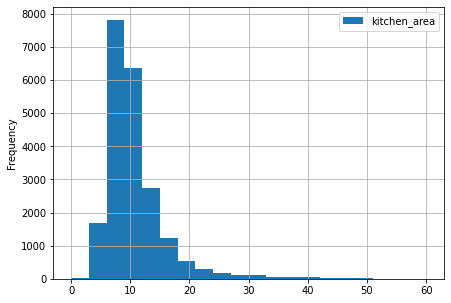

In [37]:
#Площадь кухни , kitchen_area
data.plot(y='kitchen_area',kind='hist',bins=20,grid=True,range=(0,60),figsize=(7,5))

In [38]:
#Сводная описательная сатистика столбца kitchen_area
data['kitchen_area'].describe()

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Кухни в основном составляют 6-8 кв.м., медиана 9, среднее 10 .

<AxesSubplot:ylabel='Frequency'>

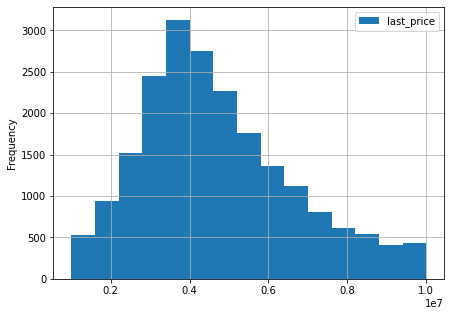

In [39]:
#Цена объекта , last_price.
data.plot(y='last_price',kind='hist',grid=True,bins=15,range=(1000000,10000000),figsize=(7,5))

In [40]:
#Сводная описательная статистика last_price
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Установили рэндж от 1кк до 10кк, цена на большинство квартир составляет 3,5-4 миллиона рублей.

<AxesSubplot:ylabel='Frequency'>

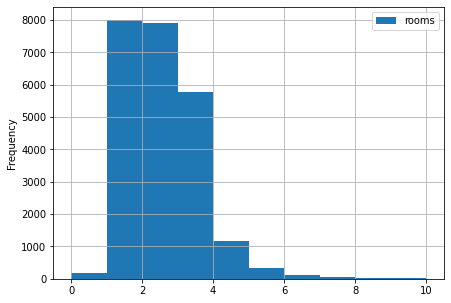

In [41]:
#Количество комнат ,rooms
data.plot(y='rooms',kind='hist',grid=True,bins=10,range=(0,10),figsize=(7,5))

На данном графике мы видим, что однокомнатных квартир - большинство, двухкомнатных квартир немного меньше, трёхкомнатных квартир ещё меньше и т.д

In [42]:
#Сводная статистика по столбцу rooms
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

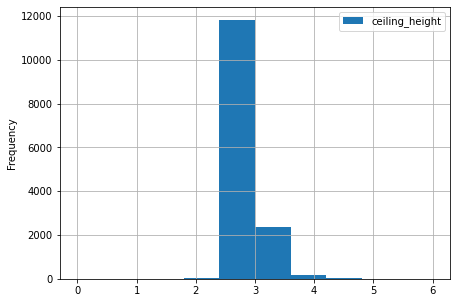

In [43]:
#Высота потолков, ceiling_height
data.plot(y='ceiling_height',kind='hist',grid=True,bins=10,range=(0,6),figsize=(7,5))

In [44]:
#Сводная статистика по столбцу ceiling_height:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Большинство потолков в квартирах имеют высоту 2,5-3 метра.

<AxesSubplot:>

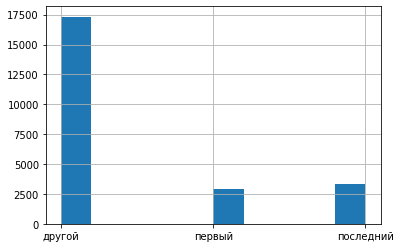

In [45]:
#тип этажа квартиры, floor_category
data['floor_category'].hist()

In [46]:
#Сводная статистика по столбцу floor_category:
data['floor_category'].describe()

count      23565
unique         3
top       другой
freq       17326
Name: floor_category, dtype: object

Квартиры на первом и последнем этажах в нашей таблице всречаются довольно редко и примерно с одинаковой частотой, большинство квартир находятся в промежутке между первым и последним.

<AxesSubplot:ylabel='Frequency'>

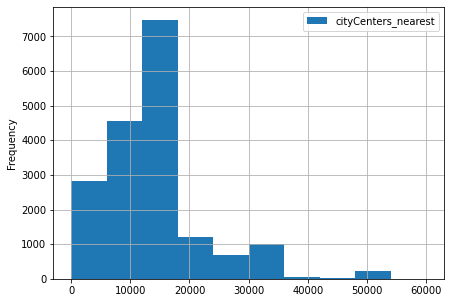

In [47]:
#Расстояние до центра города в метрах , cityCenters_nearest
data.plot(y='cityCenters_nearest',kind='hist',grid=True,bins=10,range=(0,60000),figsize=(7,5))

In [48]:
#Сводная статистика по столбцу cityCenters_nearest
data['cityCenters_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Большинство объектов недвижимости находятся на расстоянии ~ 15 км от центра города , что подтверждает среднее значение по столбцу.

<AxesSubplot:ylabel='Frequency'>

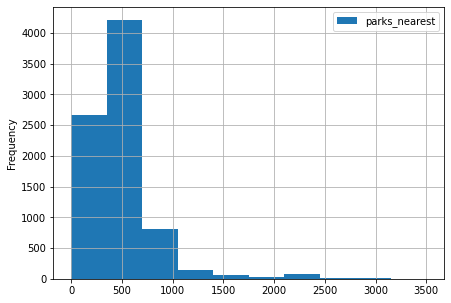

In [49]:
#Расстояние до ближайшего парка, parks_nearest (в метрах!)
data.plot(y='parks_nearest',kind='hist',grid=True,bins=10,range=(0,3500),figsize=(7,5))

In [50]:
#Сводная статистика по столбцу parks_nearest
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Большинство объектов расположены на расстоянии 300-700 метров от ближайшего парка

In [51]:
#Посмотрим сколько данных осталось после обработки
df=pd.DataFrame(data)

In [52]:
len(data) # *это для проверки()

23565

In [53]:
shape=df.shape 
shape[0] #Количество строк после обработки

23565

In [54]:
shape[1] #количество столбцов после обработки

28

In [55]:
#Изначально мы имели 22 столбца и 23699 строчки , сейчас мы имеем 28 столбцов и 23565 строчек :
# Если я всё правильно посчитал, то мы удалили 0,6% данных(строки)

In [56]:
# Теперь рассмотрим как быстро продавались квартиры, рассмотрим столбец days_exposition , этот столбец показывает сколько дней было размещено объявление.
#Описательная статистика days_exposition
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

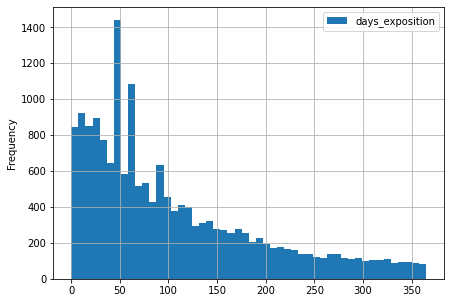

In [57]:
#Построим гистограмму по столбцу days_exposition
data.plot(y='days_exposition',kind='hist',grid=True,bins=50,range=(0,365),figsize=(7,5))

Среднее значение по столбцу составляет 180 дней, медианное значение 95, но мы не можем утверждать, что если объявление сняли, то квартира продана, возможно поменялись планы на квартиру.
Можем сделать вывод что чаще всего, квартира продаётся в первые 100 дней.

<AxesSubplot:>

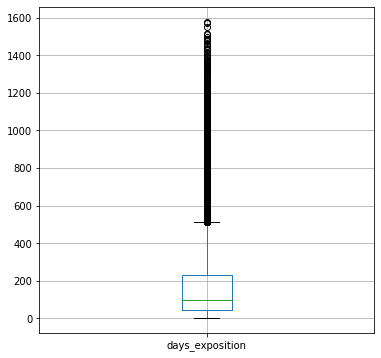

In [58]:
#Построим диаграмму размаха по столбцу days_exposition c помощью команды boxplot:
data.boxplot(column='days_exposition',figsize=(6,6))

In [59]:
#Ящик ~ 20-220 , Усы до 500дней), следовательно можем предположить что выше 500 , это выбросы.

In [60]:
# Рассмотрим , зависит ли цена объекта(last_price) от :
#общей площади;total_area
#жилой площади;living_area
#площади кухни;kitchen_area
#количества комнат;rooms
#этажа, на котором расположена квартира (первый, последний, другой); floor_category
#даты размещения (день недели, месяц, год). day_week,month,year

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

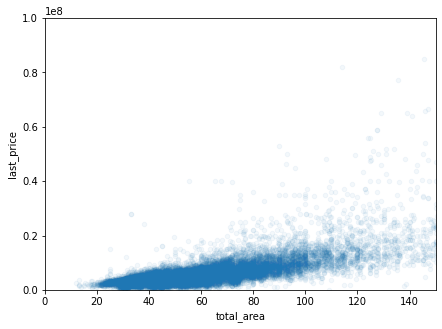

In [61]:
# Зависимость цены от общей площади:
data.plot(x='total_area', y ='last_price', kind ='scatter',legend=True,figsize=(7, 5),alpha = 0.05,ylim=(0,100000000),xlim=(0,150))

Можем сказать, что цена зависит от общей площади, чем больше площадь, тем выше цена , и наоборот. **до 100кв.м.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

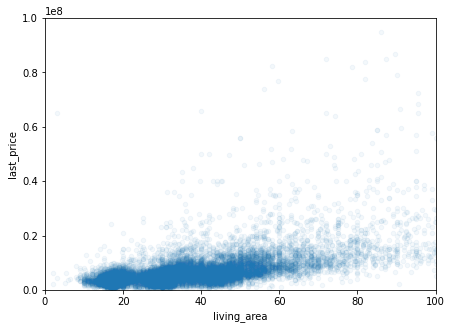

In [62]:
#Зависимость цены от жилой площади
data.plot(x='living_area',y='last_price', kind ='scatter',legend=True,figsize=(7, 5),alpha = 0.05,ylim=(0,100000000),xlim=(0,100))

Видим что с увелечением жилой площади растёт и цена. **до 60 кв.м.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

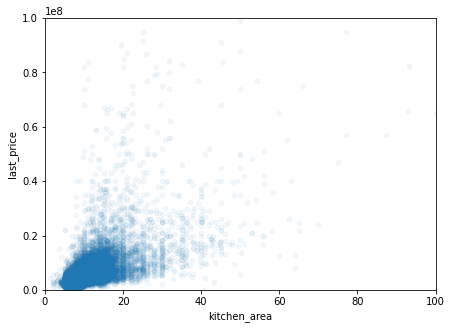

In [63]:
#площадь кухни
data.plot(x='kitchen_area',y='last_price', kind ='scatter',legend=True,figsize=(7, 5),alpha = 0.05,ylim=(0,100000000),xlim=(0,100))

Вместе с площадью кухни растёт и цена , теперь уже до 20кв.м.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

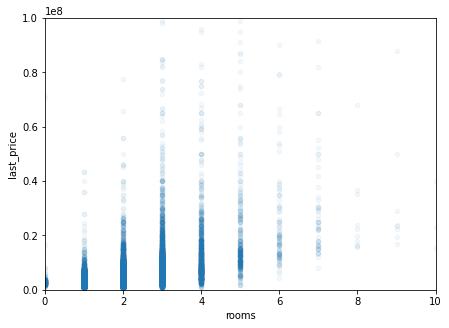

In [64]:
#Зависимость цены от количества комнат :
data.plot(x='rooms',y='last_price', kind ='scatter',legend=True,figsize=(7, 5),alpha = 0.05,ylim=(0,100000000),xlim=(0,10))

По данному графику можно сказать что самыми дорогими являются 3х комнатные квартиры .4х комнатные немного отстают,непонятно почему пятикомнатные дешевле, возможно это очень старые комунальные квартиры.

<AxesSubplot:xlabel='floor_category'>

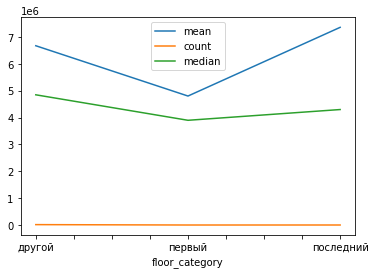

In [65]:
# Зависимость цены от категории этажа не получается, т.к выдаёт ошибку, создаём сводную таблицу
last_price_floor_category=data.pivot_table(index='floor_category',values='last_price',aggfunc=['mean','count','median'])
last_price_floor_category.columns =['mean','count','median']
last_price_floor_category.plot()





Из графика видно что среднее для квартир на первом этаже минимальна, максимальна для последних этажей. Медиана также минимальна для квартир на первом этаже, но максимальна в сторону между первым и последним.

<AxesSubplot:xlabel='year', ylabel='last_price'>

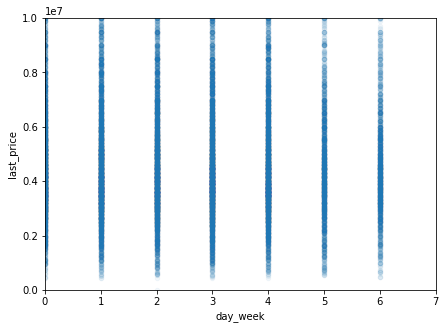

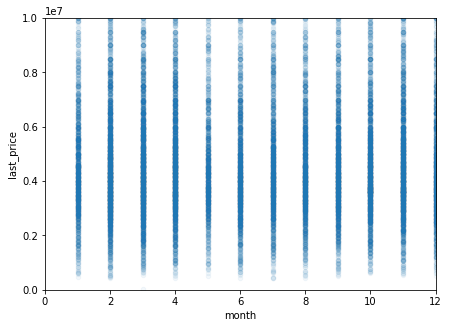

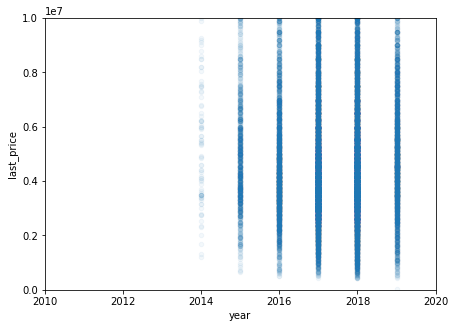

In [66]:
# Зависимость от дня размещения : day_week
data.plot(x='day_week',y='last_price', kind ='scatter',legend=True,figsize=(7, 5),alpha = 0.05,ylim=(0,10000000),xlim=(0,7))
#Зависимость от месяца размещения: month:
data.plot(x='month',y='last_price', kind ='scatter',legend=True,figsize=(7, 5),alpha = 0.05,ylim=(0,10000000),xlim=(0,12))
#Зависимость от года размещения:year:
data.plot(x='year',y='last_price', kind ='scatter',legend=True,figsize=(7, 5),alpha = 0.05,ylim=(0,10000000),xlim=(2010,2020))

Можем сказать что день и месяц размещения на цену не влияет, а вот год, 2014 выделяется, возможно в 2014 году был рост цены на недвижимость в связи с кризисом

In [67]:
#Найдём среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
more_ads = data['locality_name'].value_counts().head(10) #создадим переменную more_ads заполним её 10 насёлёнными пунктами с наибольшим числом объявлений
more_ads.head(10) #выведем на экран


Санкт-Петербург      15651
посёлок Мурино         552
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [68]:
more_ads_pivot_table = data.query('locality_name in @more_ads.index').pivot_table(index='locality_name',values='price_quare_meter')
more_ads_pivot_table.sort_values(by='price_quare_meter', ascending=False) #извелекли название населённых пунктов из переменной по индексу, составили сводную таблицу,отсортировали по уменьшению.

,price_quare_meter
locality_name,
Санкт-Петербург,114868.877339
Пушкин,103125.819377
деревня Кудрово,92473.547559
посёлок Парголово,90175.913089
посёлок Мурино,85629.568641
посёлок Шушары,78551.344647
Колпино,75424.579112
Гатчина,68746.146515
Всеволожск,68654.473970


Самая высокая стоимость квадратного метра в Санкт-Петербурге и составляет 114868р., самая низкая в г.Выборг и составляет 58141р.

In [69]:
#Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. 
#Создадим переменную СПБ и извлекём из по столбцу Locality_name Санкт-Петербург
spb=data.query('locality_name== "Санкт-Петербург"')
spb.head()
len(spb)


15651

15651 объявление о продаже недвижимости в Санкт-Петербурге

<AxesSubplot:xlabel='distance_centre_km'>

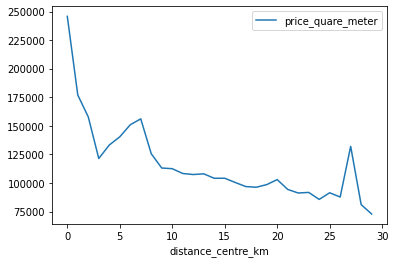

In [70]:
#Создадим сводную таблицу в которой будет средняя цена за квадратный метр и расстояние в км.
spb.pivot_table(index='distance_centre_km',values='price_quare_meter').plot() # построим график по сводной таблице

Стоимость жилья в самом центре почти достигает 250 т.р за квадратный метр. Первые 3 километра, при отдалении от центра цена за квадратный метр падает почти на 40т.р за км,дальше идёт рост с 3до 7 километров , возможно это какой-то элитный район, и далее плавно снижается.

На данном этапе был проведён исследовательский анализ данных:изучили как быстро продавались квартиры, что больше всего влияет на стоимость объекта.

5 Общий вывод
Мы провели Исследование данных о продаже квартир в Санкт-Петербурге и соседних населенных пунктах.
Мы изучили общую информацию о проекте.
Предобработали данные, обработали дубликаты, изменили типы данных столбцов которые необходимы для анализа.
Добавили в таблицу новые столбцы, которые извлекли из вводных данных.
Изучили параметры, влияющие на цену объектов.
Провели исследовательский анализ данных.
По результатам проведённых исследований можно сказать, что стоимость недвижимости зависит от множества факторов.
Основными параметрами влияющими на стоимость квартиры можно назвать её отдалённость к центру (рай.центру), т.к мы выяснили что разница между стоимостью квадратного метра в Санкт-Петербурге и Выборге разнятся почти в два раза , 114868р.в Питере и  58141р
в Выборге.
Также очень важным фактором является площадь объекта недвижимости, чем больше площадь , тем больше цена за неё.
Выполняя проектную работу мы выяснили , что :
-однокомнатных квартир - большинство, двухкомнатных квартир немного меньше, трёхкомнатных квартир ещё меньше и т.д
-чаще всего, квартира продаётся в первые 100 дней.
-Большинство объектов недвижимости находятся на расстоянии ~ 15 км от центра города
-Большинство квартир имеют суммарную площадь 30-45 квадратных метров.
-Большинство объектов расположены на расстоянии 300-700 метров от ближайшего парка
-Большинство двухкомнтаных квартир имеют общую площадь от 50 до 100 кв.м. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [х]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [х]  определены пропущенные значения
- [х]  заполнены пропущенные значения там, где это возможно
- [х]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  устранены неявные дубликаты в названиях населённых пунктов
- [х]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [х]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [х]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [х]  посчитано и добавлено в таблицу: месяц публикации объявления
- [х]  посчитано и добавлено в таблицу: год публикации объявления
- [х]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [х]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [х]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [х]  построены гистограммы для каждого параметра
- [х]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [х]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [х]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [х]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [х]  в каждом этапе есть промежуточные выводы
- [х]  есть общий вывод